In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [5]:
#Downlaod the dataset from https://www.kaggle.com/uciml/data
# read the input file 'Diabetes.csv' using Pandas

data = pd.read_csv('diabetes.csv')
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# check the dimensions of the dataset
data.shape

(768, 9)

In [10]:
# check the distribution of the dependent variable and plot it suing seaborn library
data.groupby('Outcome').size()


Outcome
0    500
1    268
dtype: int64

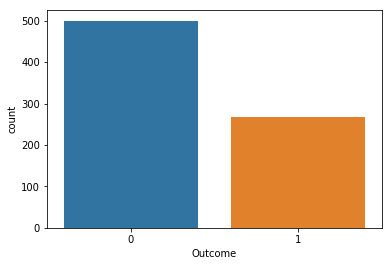

In [14]:
import seaborn as sns

sns.countplot(data['Outcome'], label="Count")

In [12]:
# check the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# check the summary of the data

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


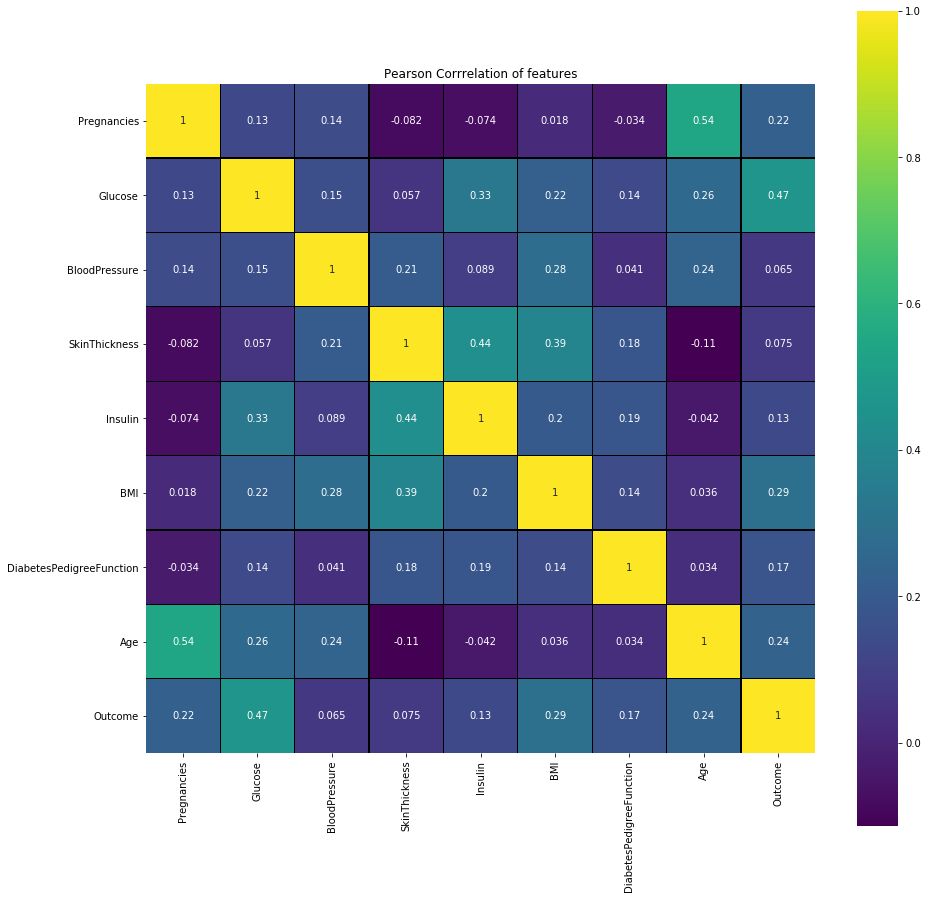

In [19]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title("Pearson Corrrelation of features")
sns.heatmap(data.corr(), cmap=colormap, annot=True, linewidths=0.1, vmax=1.0, 
            square=True, linecolor='black')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


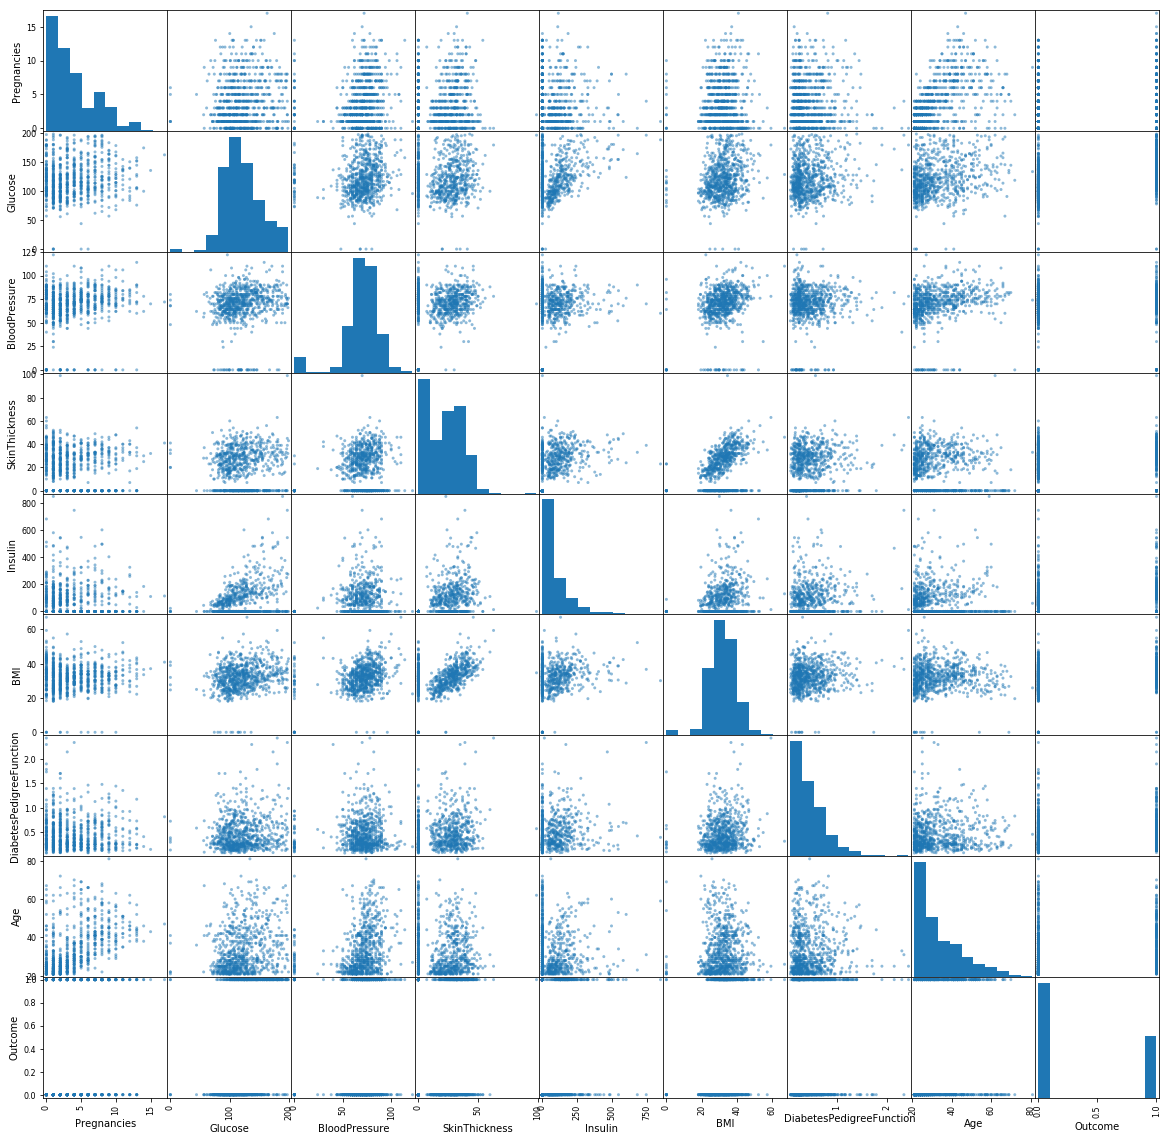

In [23]:
matrix = pd.scatter_matrix(data, figsize=(20,20), diagonal='hist' )

In [27]:
# split the dataset with stratify sampling on Outcome variable to maintain the distribution of dependent variable
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify=data['Outcome'], random_state=11)

In [28]:
X_train.shape

(576, 8)

In [31]:
# train the SVM model
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {: .2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {: .2f}".format(svc.score(X_test, y_test)))

Accuracy on training set:  1.00
Accuracy on test set:  0.65


In [32]:
# due to overfitting the test accuracy is very less as compared to the training accuracy.
#SVM requires all the features to be on a similar scale. We will need to rescale our data that all the features are approximately on the same scale and than see the performance

#Scale the data points using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [33]:
# Now fit the model on scaled data and precdict

svc = SVC()
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set: 0.76
Accuracy on test set: 0.79


In [34]:
# Scaling the data made a huge difference.But now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy.
# change C or gamma to fit a more complex model.

# try C = 1000
svc = SVC(C=1000)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))


Accuracy on training set: 0.81
Accuracy on test set: 0.76


In [35]:
# try for C=500
# try C = 1000
svc = SVC(C=500)
svc.fit(scaled_X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(scaled_X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(scaled_X_test, y_test)))

Accuracy on training set: 0.80
Accuracy on test set: 0.75


In [36]:
# larger C of 1000 was giving the better accuracy.

In [38]:
# Use smart way of finding the optimum value of C and kernel value for the optimum accuracy.

import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [
                {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                'C':[10,100,200,300,400,500,600,700,800,900,1000] 
                }
            ]



In [39]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count() )

In [40]:
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [41]:
grid_search.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
grid_search.best_score_

0.7743055555555556

In [43]:
# We again narrow down to the C with specific values around 10

param_grid = [
                {'kernel':['rbf', 'linear', 'poly', 'sigmoid'],
                'C':[0.1,0.2,0.5,0.8, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5] 
                }
            ]
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count() )
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.5, 0.8, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10, 10.5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [44]:
grid_search.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
grid_search.best_score_

0.7777777777777778